In [450]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV


 
import warnings
warnings.filterwarnings('ignore')

In [492]:
#loading dataset
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [493]:
data.shape

(1599, 12)

In [494]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


in the first look, all data is looking good and having no zeros or null values

# Data cleaning and checking null values

changing columns name

In [495]:
data.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [496]:
data.isnull().sum().sum()

0

There is no null values present

In [497]:
data.nunique()

fixed_acidity            96
volatile_acidity        143
citric_acid              80
residual_sugar           91
chlorides               153
free_sulfur_dioxide      60
total_sulfur_dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [498]:
data.duplicated().sum()

240

In [499]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Data visualization

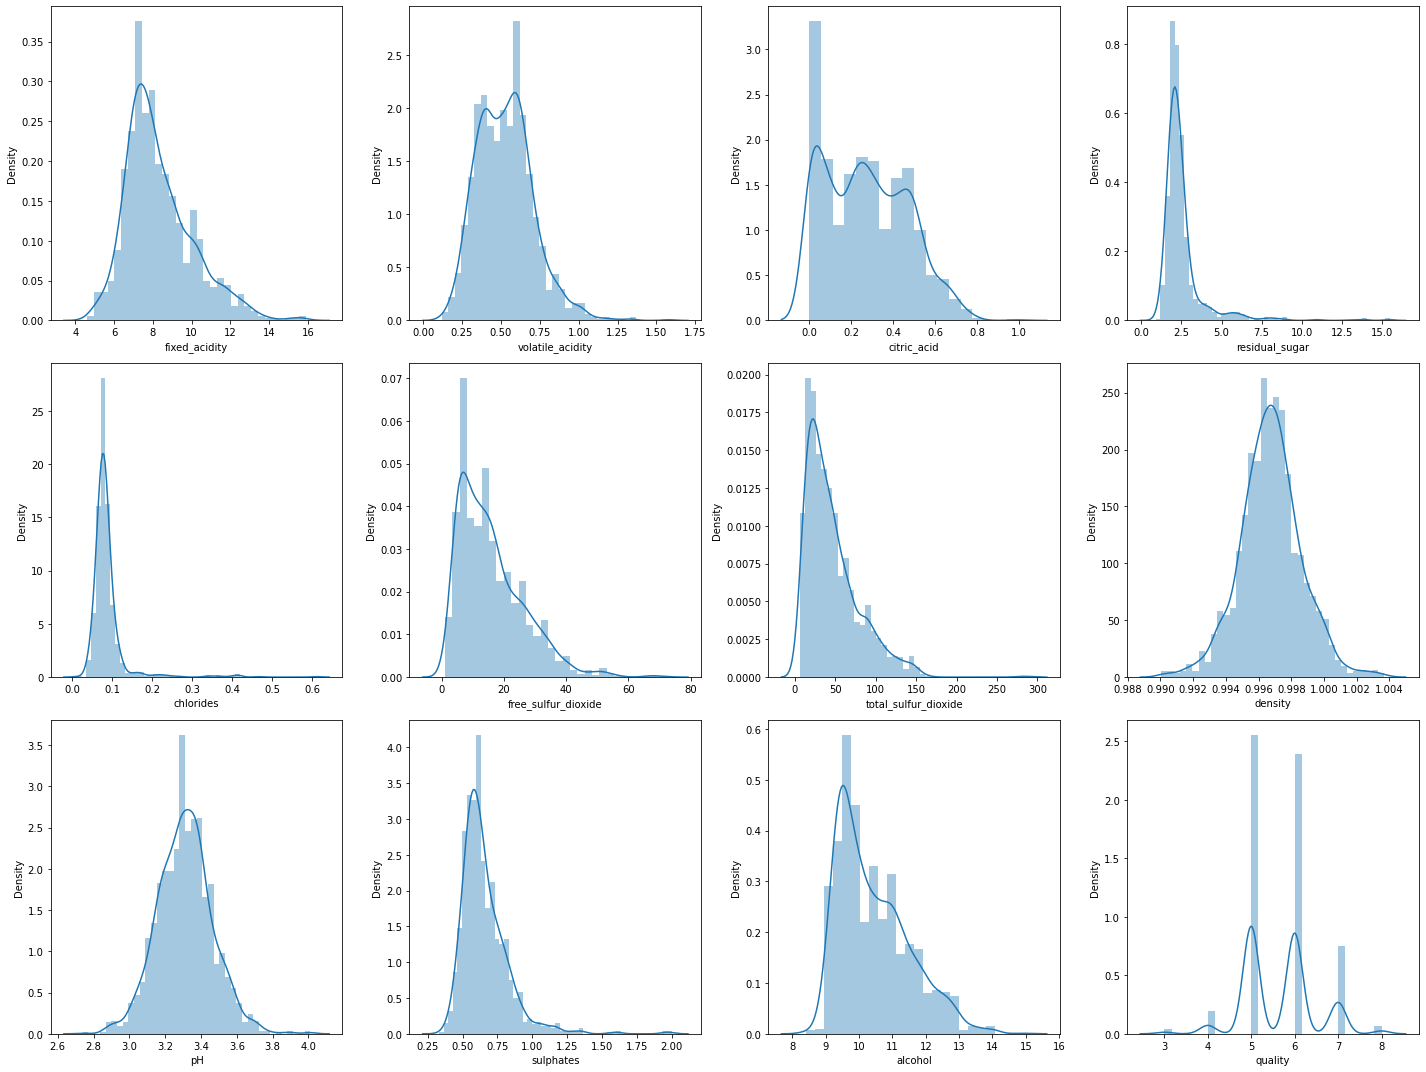

In [500]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.tight_layout()

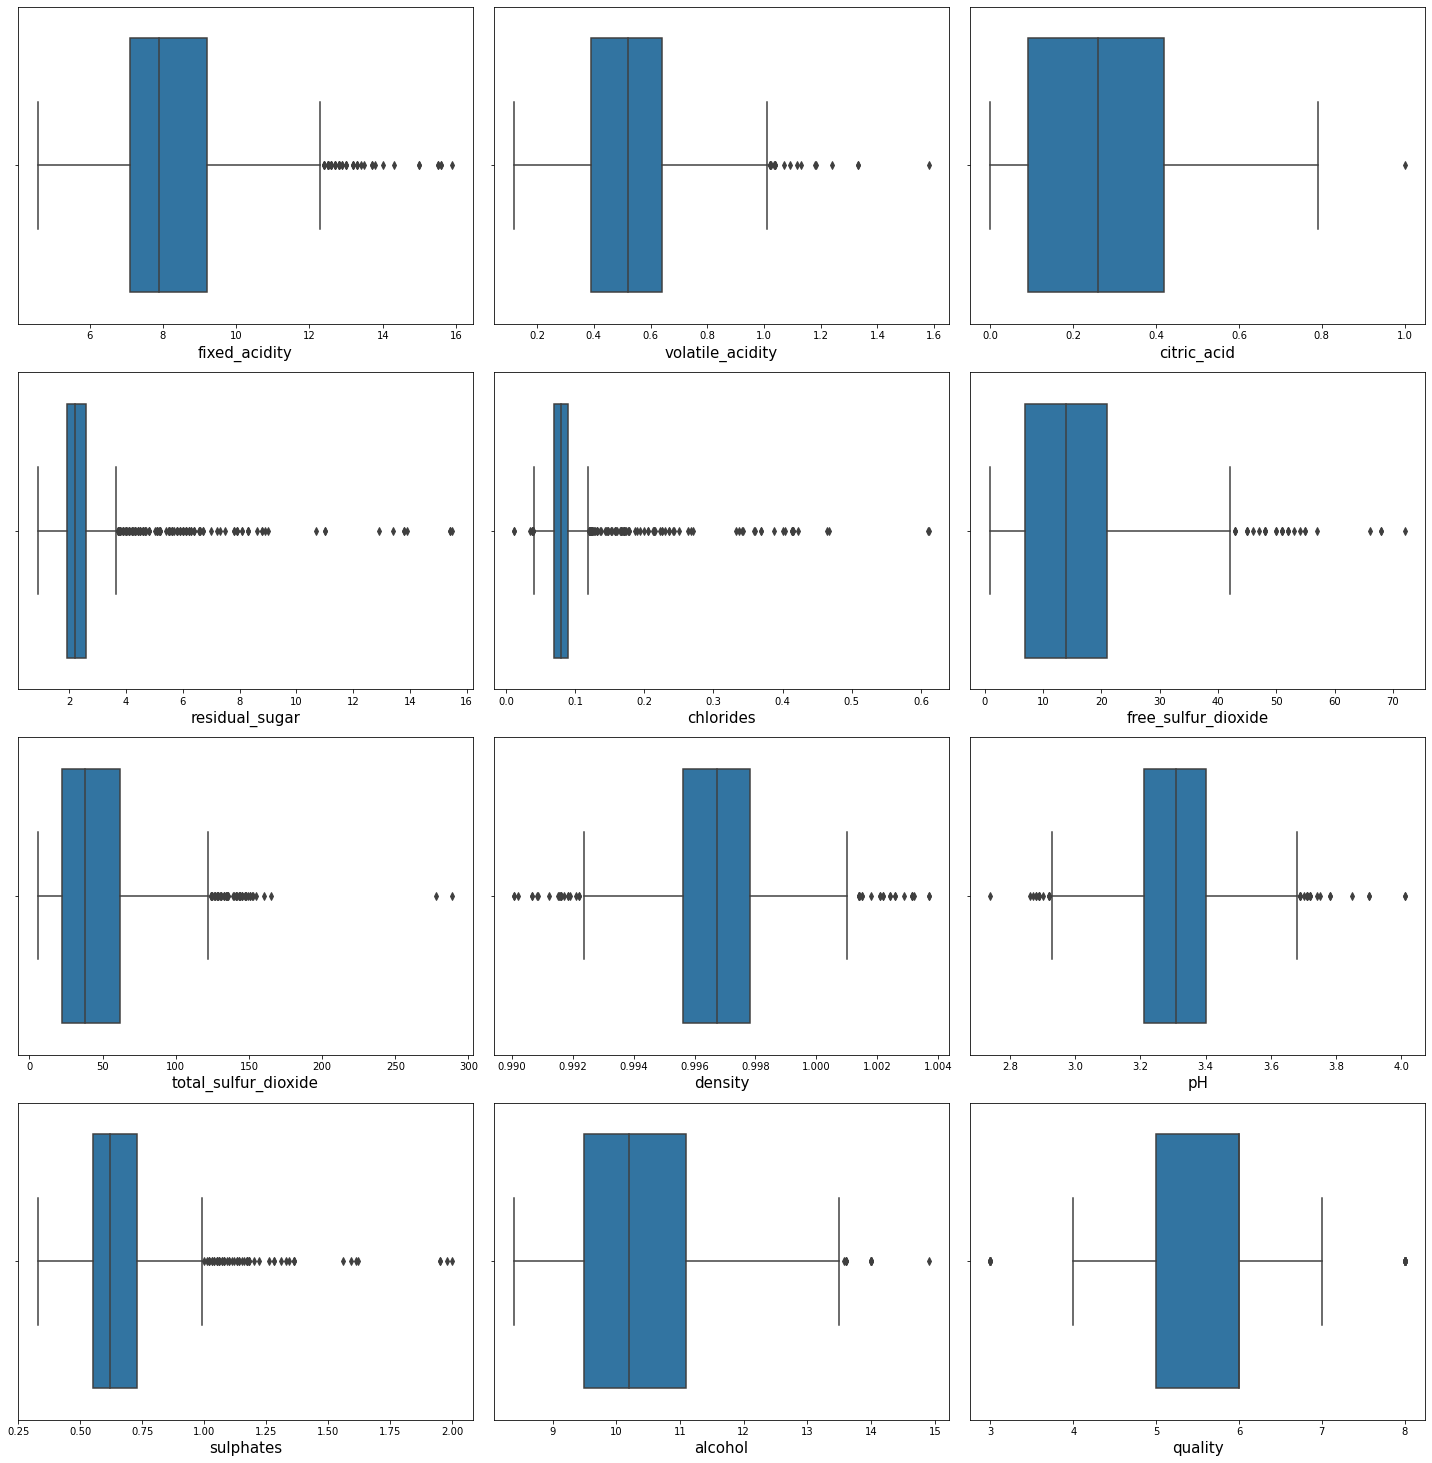

In [501]:
plt.figure(figsize=(20,25))
plotnumber=1


for column in data:
    if plotnumber<=12:
        plt.subplot(5,3,plotnumber)
        ax=sns.boxplot(data[column])
        plt.xlabel(column, fontsize=15)
        
    plotnumber+=1
plt.tight_layout()

# Removing outliers and skewness

In [502]:
#1st quantile 
q1= data.quantile(0.25)
#3rd quantile
q3=data.quantile(0.75)
#IQR
iqr=q3-q1

In [503]:
fixed_ac=(q3.fixed_acidity + (1.5*iqr.fixed_acidity))
fixed_ac               

12.349999999999998

In [504]:
index=np.where(data['fixed_acidity']> fixed_ac)
index

(array([ 205,  206,  243,  244,  264,  294,  328,  338,  339,  347,  353,
         359,  363,  364,  366,  374,  381,  391,  394,  409,  429,  440,
         442,  446,  470,  472,  509,  510,  516,  538,  544,  548,  554,
         555,  557,  559,  560,  564,  565,  596,  599,  601,  603,  611,
         652,  680,  811,  814, 1224], dtype=int64),)

In [505]:
data=data.drop(data.index[index])
data.reset_index()

,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1546,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1547,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1548,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [506]:
data.shape

(1550, 12)

In [507]:
volatile_ac=(q3.volatile_acidity + (1.5*iqr.volatile_acidity))
print(volatile_ac)   

index=np.where(data['volatile_acidity']> volatile_ac)
index

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

1.0150000000000001
(1531, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1527,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1528,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1529,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [508]:
index

(array([  38,   94,  120,  126,  127,  134,  199,  521,  627,  644,  654,
         659,  664,  678,  851, 1212, 1250, 1263, 1418], dtype=int64),)

In [509]:
residual_s=(q3.residual_sugar + (1.5*iqr.residual_sugar))
print(residual_s)   

index=np.where(data['residual_sugar']> residual_s)
index

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

3.6500000000000004
(1393, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1389,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1390,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1391,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [510]:
chloride=(q3.chlorides + (1.5*iqr.chlorides))
print(chloride)   

index=np.where(data['chlorides']> chloride)
index

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

0.11999999999999998
(1311, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1307,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1308,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1309,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [511]:
free_sulfur=(q3.free_sulfur_dioxide + (1.5*iqr.free_sulfur_dioxide))
print(free_sulfur)   

index=np.where(data['free_sulfur_dioxide']> free_sulfur)
index

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

42.0
(1295, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1291,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1292,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1293,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [512]:
total_sulfur=(q3.total_sulfur_dioxide + (1.5*iqr.total_sulfur_dioxide))
print(total_sulfur)

index=np.where(data['total_sulfur_dioxide']> total_sulfur)
index

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

122.0
(1259, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1255,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1256,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1257,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [513]:
den=(q3.density + (1.5*iqr.density))
print(den)

index=np.where(data['density']> den)
index

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

1.0011875
(1259, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1255,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1256,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1257,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [514]:
den1=(q1.density - (1.5*iqr.density))
print(den1)

index=np.where(data['density'] < den1)
index

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

0.9922475000000001
(1241, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1237,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1238,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1239,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [515]:
ph1=(q1.pH - (1.5*iqr.pH))
print(ph1)

index=np.where(data['pH'] < ph1)
index

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

2.925
(1237, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1233,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1234,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1235,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [516]:
ph2=(q3.pH + (1.5*iqr.pH))
print(ph2)

index=np.where(data['pH'] > ph2)
index

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

3.6849999999999996
(1222, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1218,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1219,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1220,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [517]:
sulphate=(q3.sulphates + (1.5*iqr.sulphates))
print(sulphate)

index=np.where(data['sulphates'] > sulphate)
index

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

0.9999999999999999
(1202, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1198,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1199,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1200,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Data visualization after removing the outliers and skewness

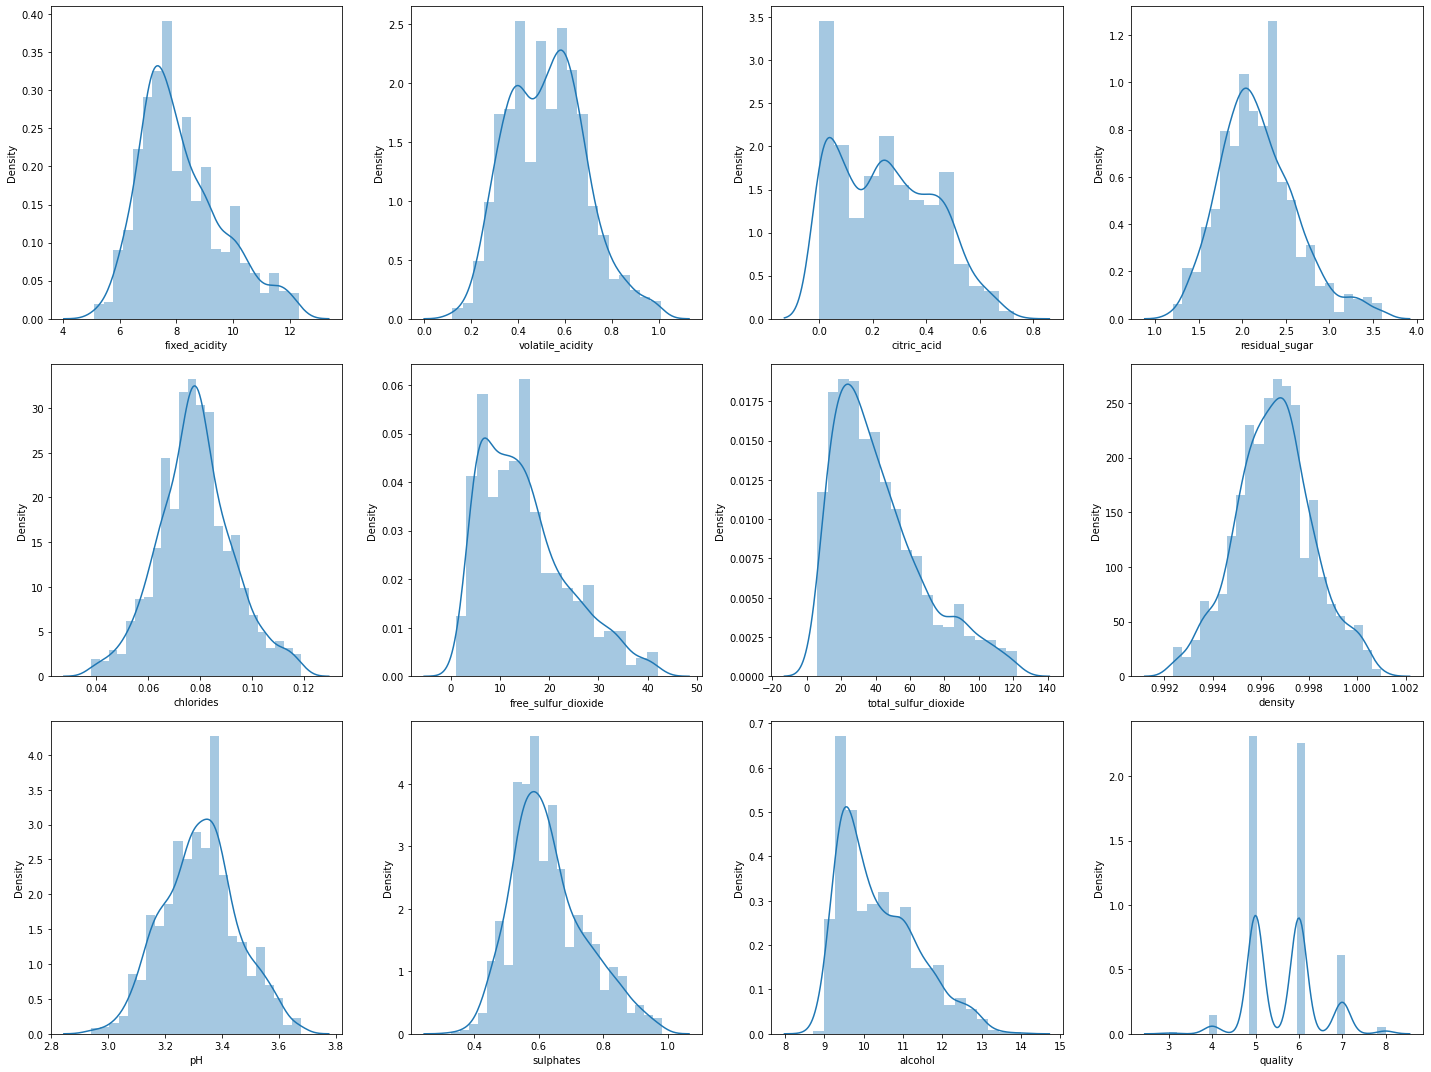

In [518]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.tight_layout()

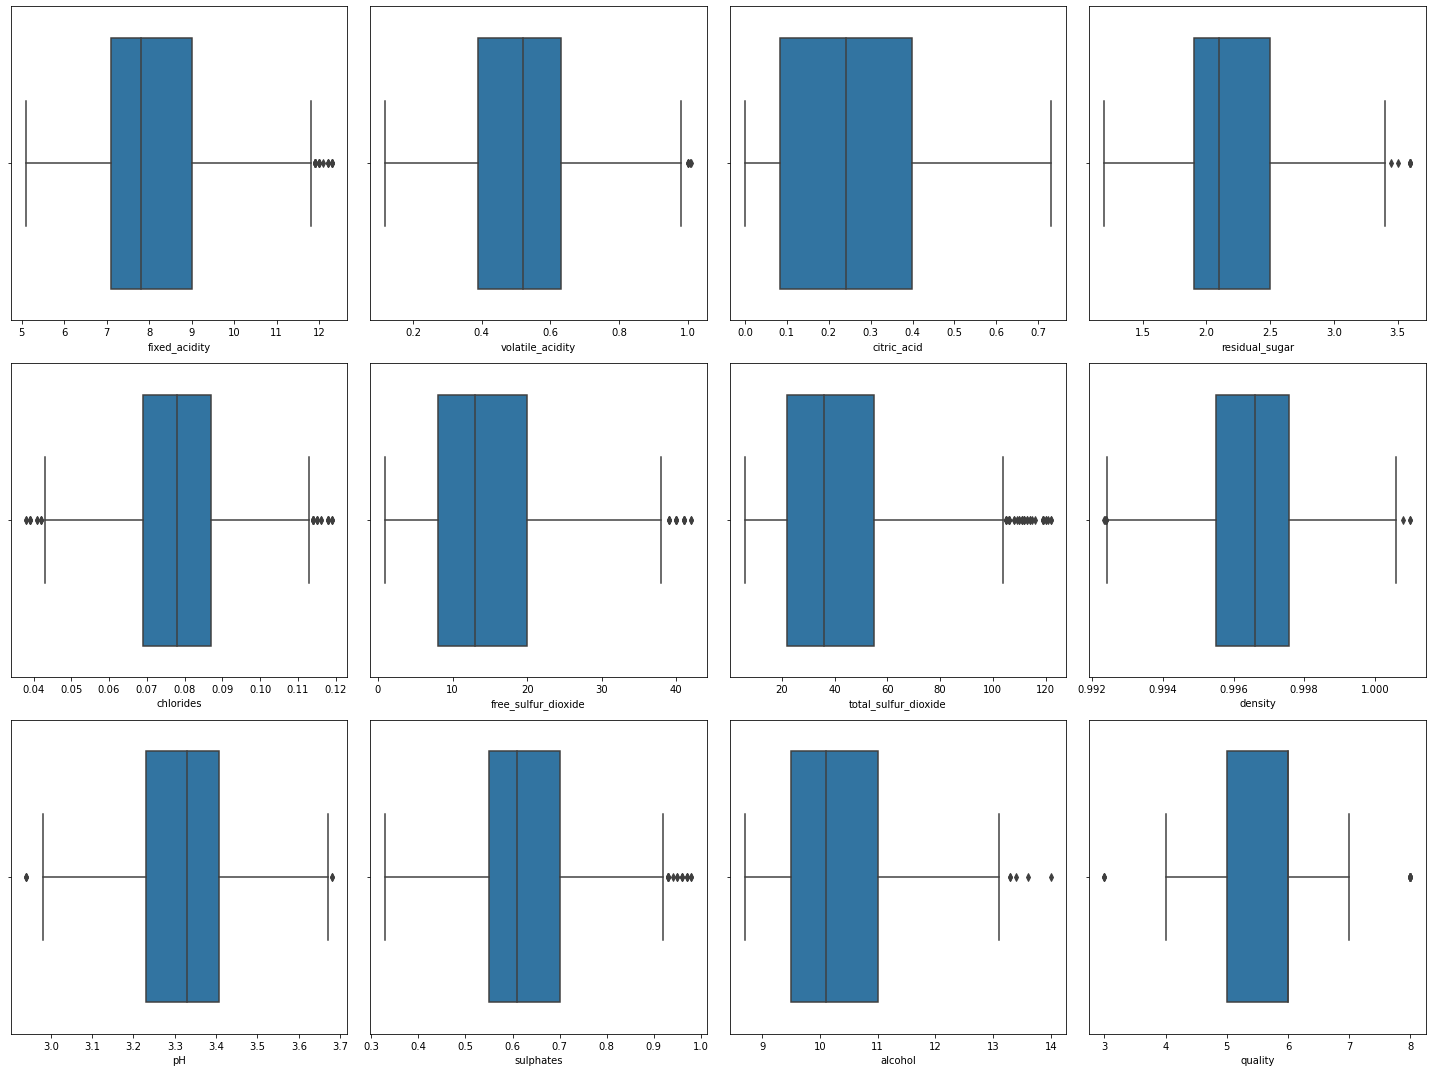

In [519]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.tight_layout()

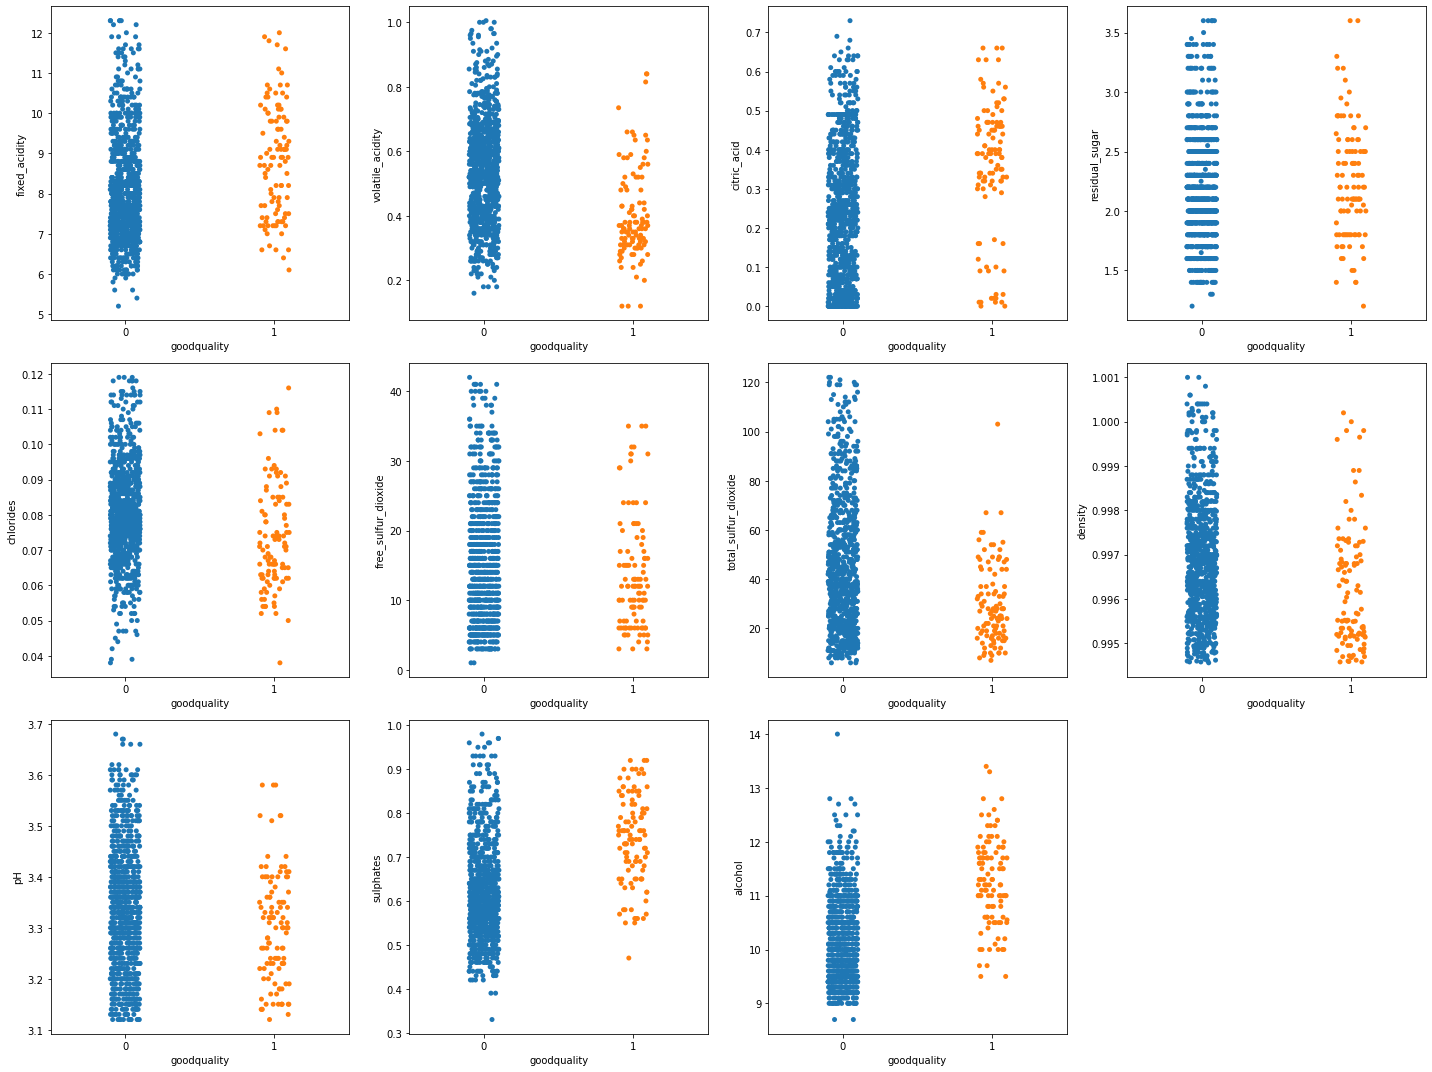

In [520]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in X :
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.stripplot(y,X[column])
        
    plotnumber+=1
plt.tight_layout()

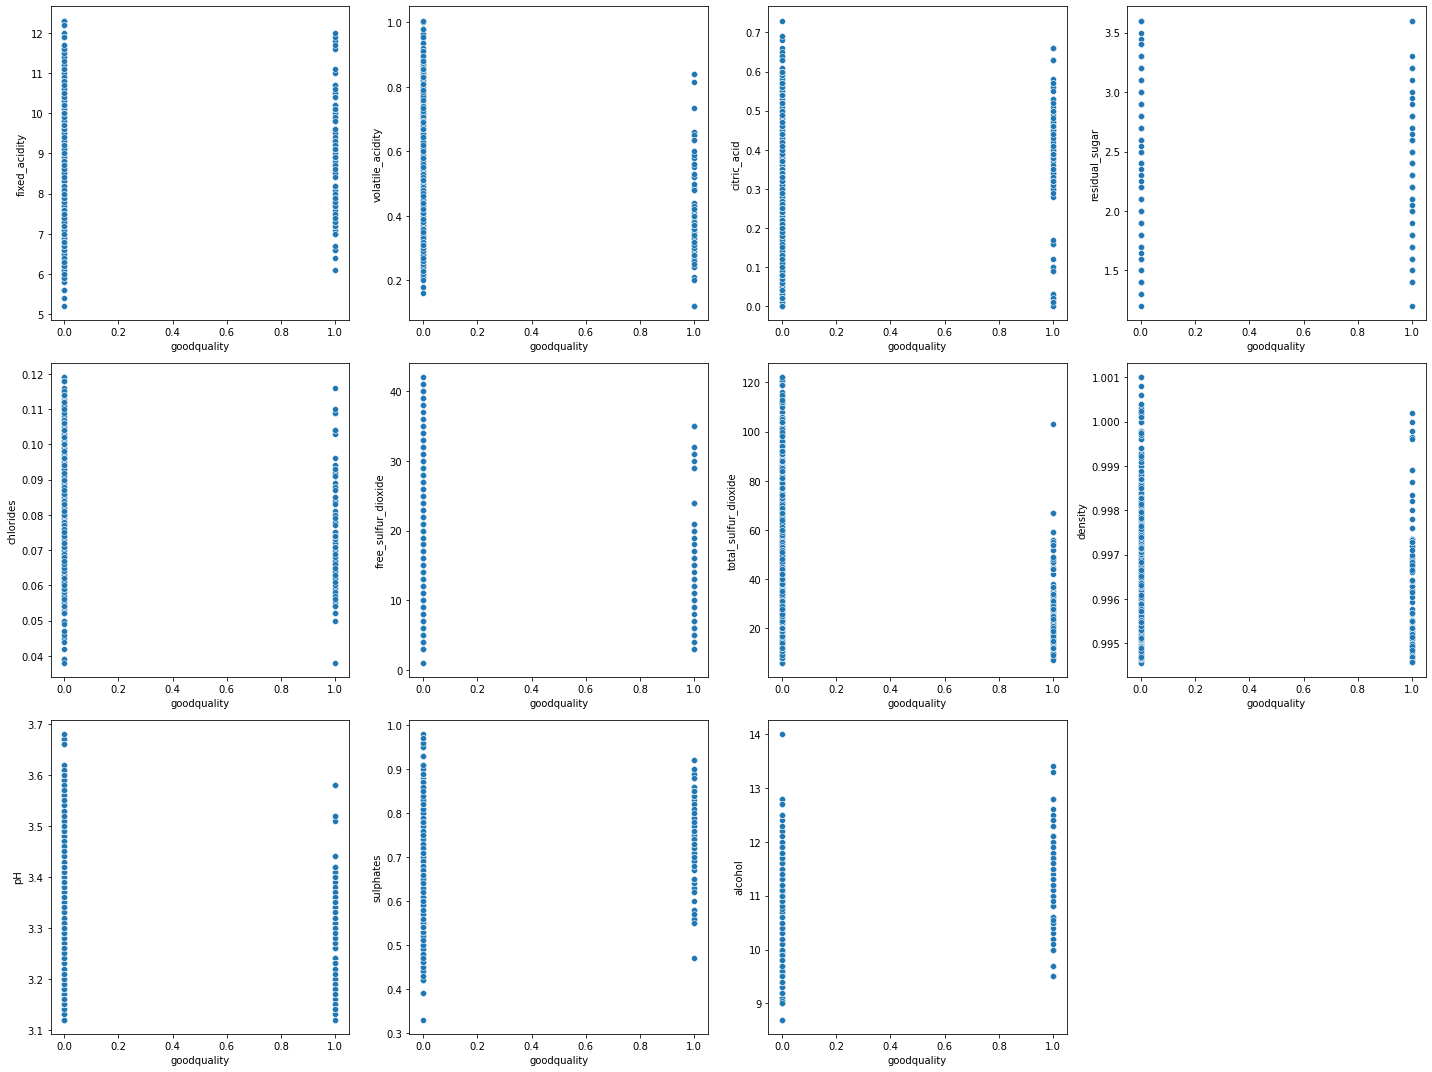

In [521]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in X :
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.scatterplot(y,X[column])
        
    plotnumber+=1
plt.tight_layout()

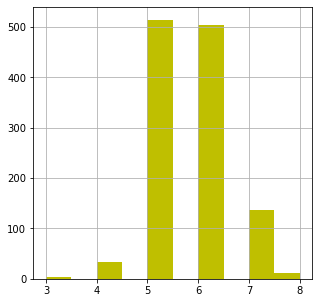

In [522]:
data['quality'].hist(color='y',figsize=(5,5))
plt.show()

# Checking Multicollinearity and mapping heatmap

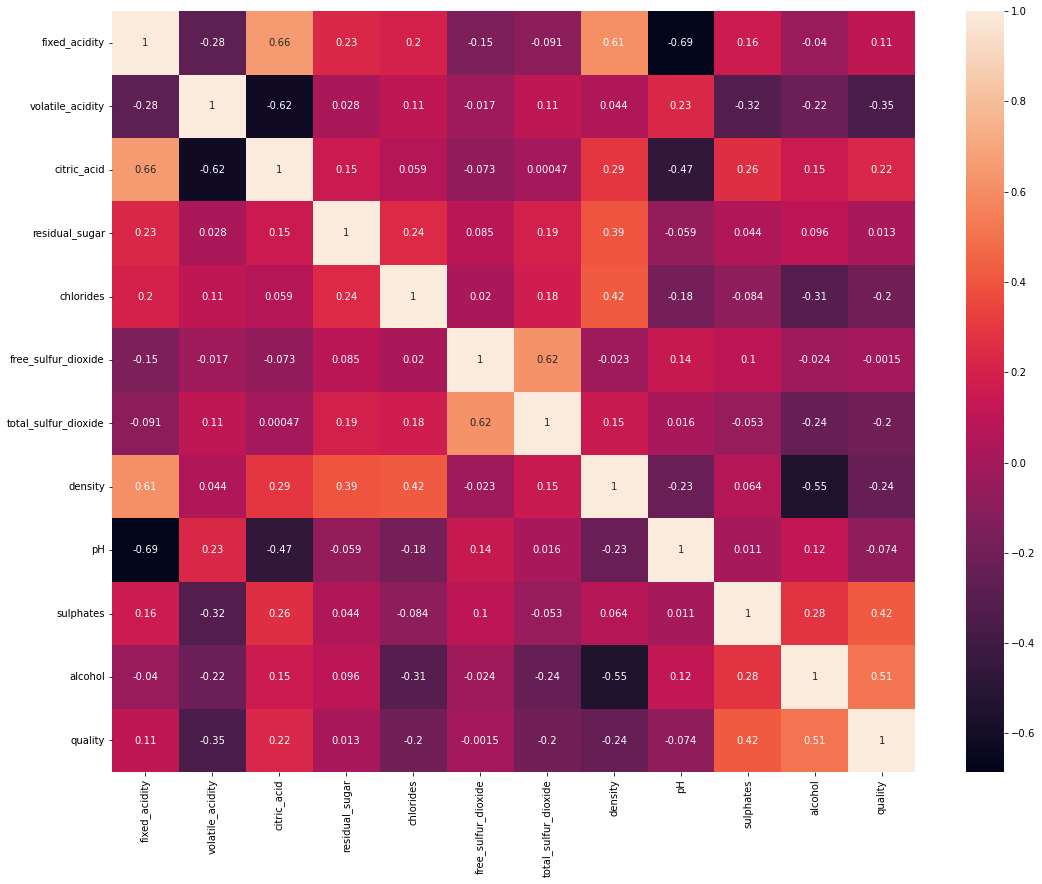

In [523]:
plt.figure(figsize=(18,14))
sns.heatmap(data.corr(), annot=True,annot_kws={'size':10})
plt.show()

# # Create Classification version of target variable

In [524]:

data['goodquality'] = [1 if x >= 7 else 0 for x in data['quality']]
# Separate feature variables and target variable
X = data.drop(['quality','goodquality'], axis = 1)

y = data['goodquality']


In [525]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [526]:
# See proportion of good vs bad wines
data['goodquality'].value_counts()

0    1053
1     149
Name: goodquality, dtype: int64

#Checking multicollinearity among features


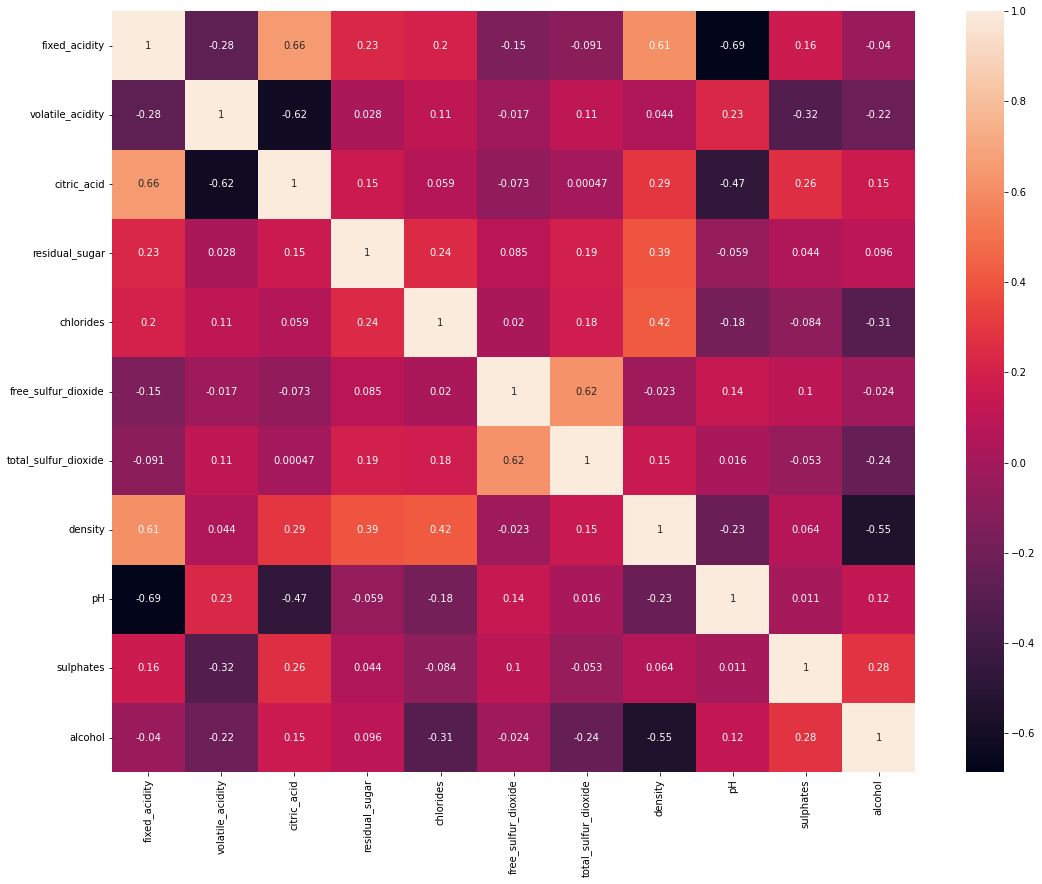

In [527]:
plt.figure(figsize=(18,14))
sns.heatmap(X.corr(), annot=True,annot_kws={'size':10})
plt.show()

# Standarization of features 

In [528]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [529]:
X_scaled.shape

(1202, 11)

# #checking for collinearity by vif

In [530]:


vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i)for i in range(X_scaled.shape[1])]
vif["features"]=X.columns


vif

,vif,features
0,6.805243,fixed_acidity
1,1.967655,volatile_acidity
2,3.020107,citric_acid
3,1.722677,residual_sugar
4,1.305165,chlorides
5,1.815970,free_sulfur_dioxide
6,2.047824,total_sulfur_dioxide
7,6.730471,density
8,3.085888,pH
9,1.331152,sulphates


#### There is not showing any data having greater vif show we can say that there is no multicollinearity 

###### Now checking Cross validation for each model

In [531]:

from sklearn. model_selection import cross_val_score

## Splitting the data and building model

In [532]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = trainf_test_split(X_scaled, y, test_size=.25, random_state=0)

### 1 LogisticRegression Model

In [533]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
model1= LogisticRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       262
           1       0.70      0.36      0.47        39

    accuracy                           0.90       301
   macro avg       0.81      0.67      0.71       301
weighted avg       0.88      0.90      0.88       301



### Cross validation score 

In [534]:
cross_val_score(model1,X_scaled,y,cv=5).mean()

0.8901867219917012

### 2 DecisionTreeClassifier Model

In [535]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       262
           1       0.56      0.56      0.56        39

    accuracy                           0.89       301
   macro avg       0.75      0.75      0.75       301
weighted avg       0.89      0.89      0.89       301



In [536]:
cross_val_score(model2,X_scaled,y,cv=5).mean()

0.8102973720608574

### 3 RandomForestClassifier

In [537]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       262
           1       0.77      0.44      0.56        39

    accuracy                           0.91       301
   macro avg       0.85      0.71      0.75       301
weighted avg       0.90      0.91      0.90       301



In [538]:
cross_val_score(model3,X_scaled,y,cv=5).mean()

0.8918533886583679

### 4 GradientBoostingClassifier model

In [539]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       262
           1       0.74      0.51      0.61        39

    accuracy                           0.91       301
   macro avg       0.84      0.74      0.78       301
weighted avg       0.91      0.91      0.91       301



In [540]:
cross_val_score(model4,X_scaled,y,cv=5).mean()

0.8693741355463349

### 5 AdaBoostClassifier model

In [541]:
from sklearn.ensemble import AdaBoostClassifier
model5 = AdaBoostClassifier(random_state=1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       262
           1       0.57      0.41      0.48        39

    accuracy                           0.88       301
   macro avg       0.74      0.68      0.71       301
weighted avg       0.87      0.88      0.88       301



In [542]:
cross_val_score(model5,X_scaled,y,cv=5).mean()

0.8635442600276624

### I have choosen model1 because it has very less difference b/w accuracy score and cross validation score. 

# now, performing hyperparameter tunning

In [543]:
from sklearn.model_selection import GridSearchCV

In [544]:
param_grid={'penalty':['l1','l2','elasticnet','none'],
            'C':np.logspace(-2,2,10),
            'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
            

        }

In [545]:
grid_search=GridSearchCV(estimator=model1, param_grid=param_grid,n_jobs=-1)

In [546]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']})

In [547]:
best_param =grid_search.best_params_
print(best_param)

{'C': 0.027825594022071243, 'penalty': 'l2', 'solver': 'lbfgs'}


In [548]:
grid_search.best_score_

0.8934683855125843

In [549]:
grid_search=LogisticRegression(C= 0.5994842503189409, penalty= 'l1', solver= 'liblinear')
grid_search.fit(X_train,y_train)

LogisticRegression(C=0.5994842503189409, penalty='l1', solver='liblinear')

In [550]:
y_pred1=grid_search.predict(X_test)

In [551]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       262
           1       0.74      0.36      0.48        39

    accuracy                           0.90       301
   macro avg       0.82      0.67      0.71       301
weighted avg       0.89      0.90      0.88       301



## conclusion- after hyperparameter tuning, there is no much differences in accuracy score. 
## For me model 1 is my best model for this project